In [4]:
%load_ext watermark
%watermark -p pandas,numpy,datetime,matplotlib,pandas_datareader,yfinance

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pandas 1.0.1
numpy 1.18.1
datetime 4.3
matplotlib 3.1.3
pandas_datareader 0.8.1
yfinance 0.1.54


In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [7]:
from pandas_datareader import data as pdr
import yfinance as yf

tsla = pdr.get_data_yahoo('TSLA', 
                          start=datetime.datetime(2010, 7, 2), 
                          end=datetime.datetime(2019, 7, 2))
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700,15.800000
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400,17.459999
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600,17.400000


In [8]:
tsla.index

# Inspect the columns
tsla.columns

# Select only the last 10 observations of `Close`
ts = tsla['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [10]:
# Inspect the first rows of July 2010-2019
print(tsla.loc[pd.Timestamp('2010-07-01'):pd.Timestamp('2019-07-1')].head())

# Inspect the first rows of 2010 
print(tsla.loc['2019'].head())

# Inspect November 2019
print(tsla.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2010-07-01 and 2019-07-01
print(tsla.iloc[[22,43], [0, 3]])

                 High        Low       Open      Close   Volume  Adj Close
Date                                                                      
2010-07-02  23.100000  18.709999  23.000000  19.200001  5139800  19.200001
2010-07-06  20.000000  15.830000  20.000000  16.110001  6866900  16.110001
2010-07-07  16.629999  14.980000  16.400000  15.800000  6921700  15.800000
2010-07-08  17.520000  15.570000  16.139999  17.459999  7711400  17.459999
2010-07-09  17.900000  16.549999  17.580000  17.400000  4050600  17.400000
                  High         Low        Open       Close    Volume  \
Date                                                                   
2019-01-02  315.130005  298.799988  306.100006  310.119995  11658600   
2019-01-03  309.399994  297.380005  307.000000  300.359985   6965200   
2019-01-04  318.000000  302.730011  306.000000  317.690002   7394100   
2019-01-07  336.739990  317.750000  321.720001  334.959991   7551200   
2019-01-08  344.010010  327.019989  341.959

In [11]:
# Sample 20 rows
sample = tsla.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_tsla = tsla.resample('M')

# Print `monthly_tsla`
print(monthly_tsla)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2010-07-07   16.629999   14.980000   16.400000   15.800000   6921700   
2012-09-20   31.500000   30.680000   30.930000   30.900000    912400   
2016-02-11  163.259995  147.000000  152.000000  150.470001  14252400   
2017-05-15  320.200012  312.529999  318.380005  315.880005   7622000   
2015-03-09  194.490005  188.250000  194.389999  190.880005   6736700   
2012-09-26   28.400000   27.480000   27.660000   27.540001   1527200   
2014-08-01  237.500000  226.000000  226.089996  233.270004  11895800   
2017-06-23  386.989990  379.350006  382.450012  383.450012   6445800   
2012-09-11   28.160000   27.400000   27.760000   27.799999   1014900   
2013-02-06   39.389999   37.900002   38.180000   39.169998   1893200   
2018-05-25  279.640015  275.609985  277.630005  278.850006   3875100   
2014-01-23  182.380005  173.419998  177.229996  181.500000   786

In [12]:
# Add a column `diff` to `tsla` 
tsla['diff'] = tsla.Open - tsla.Close

# Delete the new `diff` column
del tsla['diff']

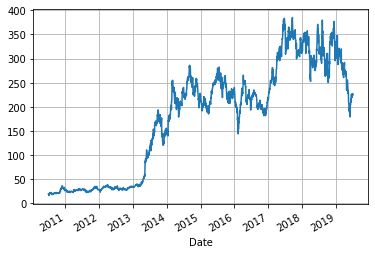

In [13]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `tsla`
tsla['Close'].plot(grid=True)

# Show the plot
plt.show()

In [14]:
daily_close = tsla[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2010-07-02   0.000000
2010-07-06  -0.160938
2010-07-07  -0.019243
2010-07-08   0.105063
2010-07-09  -0.003436
...               ...
2019-06-26  -0.002230
2019-06-27   0.016281
2019-06-28   0.002782
2019-07-01   0.016602
2019-07-02  -0.011533

[2265 rows x 1 columns]
            Adj Close
Date                 
2010-07-02        NaN
2010-07-06  -0.175470
2010-07-07  -0.019430
2010-07-08   0.099903
2010-07-09  -0.003442
...               ...
2019-06-26  -0.002232
2019-06-27   0.016150
2019-06-28   0.002778
2019-07-01   0.016466
2019-07-02  -0.011600

[2265 rows x 1 columns]


In [15]:
# Resample `tsla` to business months, take last observation as value 
monthly = tsla.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = tsla.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-30,0.127590,0.165894,0.128515,0.155802,-0.716317,0.155802
2011-03-31,0.149902,0.155652,0.159470,0.148722,0.894033,0.148722
2011-07-31,0.065285,0.069197,0.065074,0.066702,-0.036547,0.066702
2011-11-30,-0.012276,-0.021633,-0.019132,-0.012126,-0.260684,-0.012126
2012-03-31,0.152361,0.164481,0.159739,0.156257,0.028871,0.156257
2012-07-31,0.006948,0.001911,0.005961,0.000199,0.240369,0.000199
2012-11-30,-0.065327,-0.058740,-0.064600,-0.058852,-0.142288,-0.058852
2013-03-31,0.210410,0.219964,0.214389,0.213378,0.313995,0.213378


In [16]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
2010-07-02        NaN
2010-07-06  -0.160938
2010-07-07  -0.019243
2010-07-08   0.105063
2010-07-09  -0.003436
...               ...
2019-06-26  -0.002230
2019-06-27   0.016281
2019-06-28   0.002782
2019-07-01   0.016602
2019-07-02  -0.011533

[2265 rows x 1 columns]


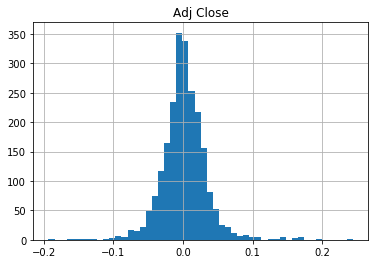

         Adj Close
count  2264.000000
mean      0.001606
std       0.032372
min      -0.193274
25%      -0.014831
50%       0.000565
75%       0.017764
max       0.243951


In [17]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [18]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2010-07-02        NaN
2010-07-06   0.839062
2010-07-07   0.822917
2010-07-08   0.909375
2010-07-09   0.906250
...               ...
2019-06-26  11.420312
2019-06-27  11.606249
2019-06-28  11.638542
2019-07-01  11.831770
2019-07-02  11.695312

[2265 rows x 1 columns]


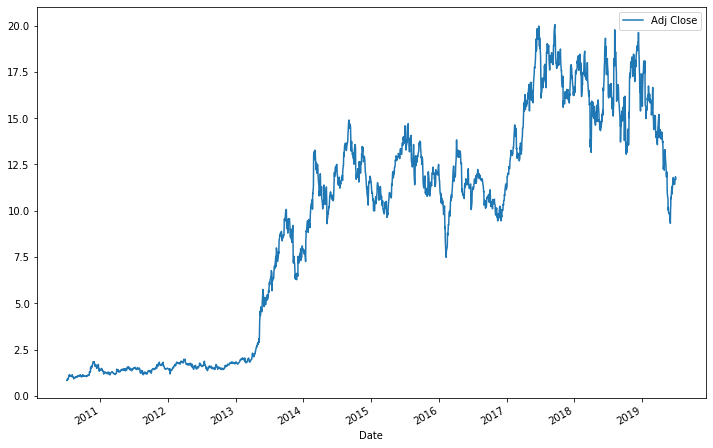

In [19]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [20]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2010-07-31   1.013048
2010-08-31   1.016193
2010-09-30   1.080233
2010-10-31   1.078819
2010-11-30   1.512599
...               ...
2019-03-31  14.466517
2019-04-30  13.888318
2019-05-31  11.443513
2019-06-30  11.131067
2019-07-31  11.763541

[109 rows x 1 columns]


In [22]:
from pandas_datareader import data as pdr
import yfinance as yf

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['TSLA', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2010, 7, 1), datetime.datetime(2019, 7, 1))
all_data.head()

High        Low       Open      Close     Volume  \
Ticker Date                                                                
TSLA   2010-07-01  25.920000  20.270000  25.000000  21.959999  8218800.0   
       2010-07-02  23.100000  18.709999  23.000000  19.200001  5139800.0   
       2010-07-06  20.000000  15.830000  20.000000  16.110001  6866900.0   
       2010-07-07  16.629999  14.980000  16.400000  15.800000  6921700.0   
       2010-07-08  17.520000  15.570000  16.139999  17.459999  7711400.0   

                   Adj Close  
Ticker Date                   
TSLA   2010-07-01  21.959999  
       2010-07-02  19.200001  
       2010-07-06  16.110001  
       2010-07-07  15.800000  
       2010-07-08  17.459999

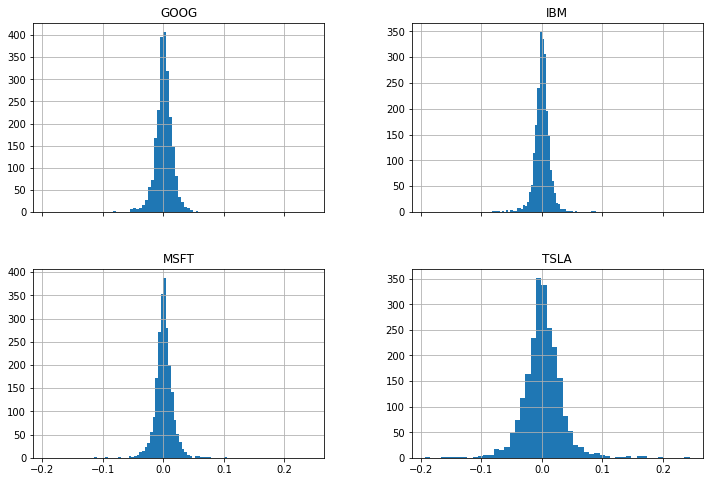

In [23]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

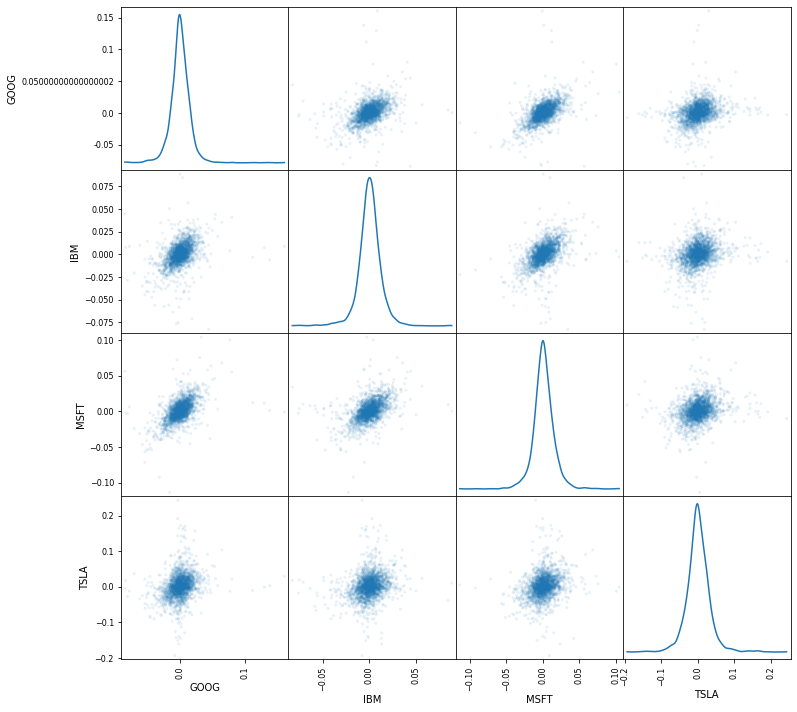

In [24]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [26]:
# Isolate the adjusted closing prices 
adj_close_px = tsla['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2019-06-19    219.48025
2019-06-20    218.50425
2019-06-21    217.86000
2019-06-24    217.57250
2019-06-25    217.02975
2019-06-26    216.54425
2019-06-27    216.26500
2019-06-28    215.74900
2019-07-01    215.05250
2019-07-02    214.28275
Name: Adj Close, dtype: float64

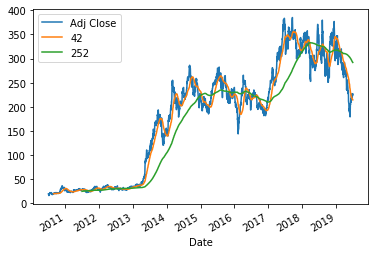

In [27]:
# Short moving window rolling mean
tsla['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
tsla['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
tsla[['Adj Close', '42', '252']].plot()

plt.show()

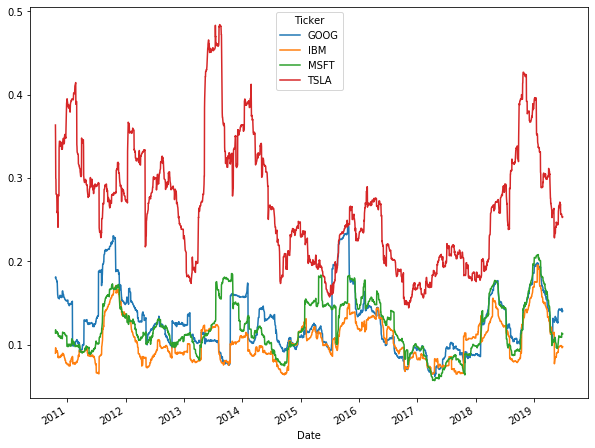

In [28]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [32]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas import tseries

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'TSLA']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['TSLA', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['TSLA'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     155.6
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.39e-34
Time:                        14:45:49   Log-Likelihood:                 6461.7
No. Observations:                2264   AIC:                        -1.292e+04
Df Residuals:                    2262   BIC:                        -1.291e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      2.601      0.0

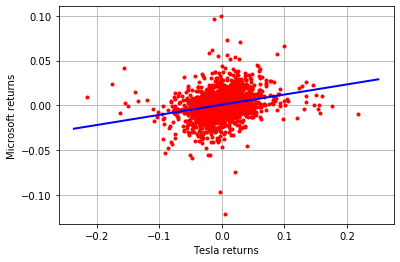

In [33]:
plt.plot(return_data['TSLA'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Tesla returns')
plt.ylabel('Microsoft returns')

plt.show()

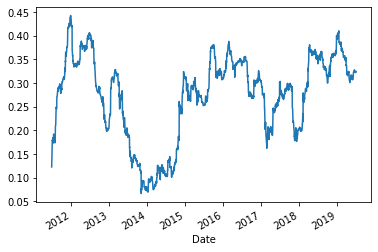

In [34]:
return_data['MSFT'].rolling(window=252).corr(return_data['TSLA']).plot()
plt.show()

In [35]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=tsla.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = tsla['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = tsla['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

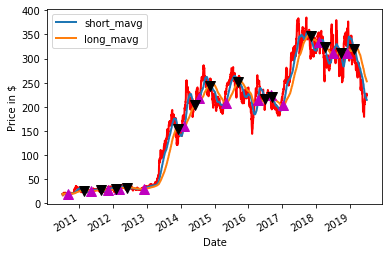

In [36]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
tsla['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [37]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 600*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(tsla['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(tsla['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(tsla['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

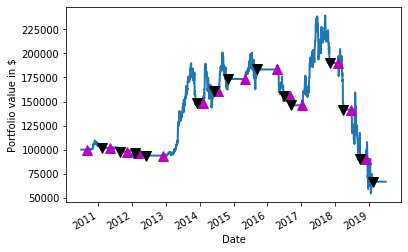

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [39]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.05312896405018159


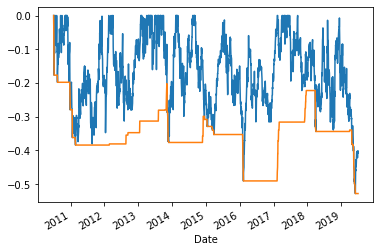

In [40]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = tsla['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = tsla['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [41]:
# Get the number of days in `aapl`
days = (tsla.index[-1] - tsla.index[0]).days

# Calculate the CAGR 
cagr = ((((tsla['Adj Close'][-1]) / tsla['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.3398553733713372
